In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('cars24-car-price-clean.csv')

In [4]:
df.shape

(19820, 18)

In [5]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [6]:
# Univariate 
X = df['max_power'].values

# target
Y = df['selling_price'].values

In [39]:
def hypothesis(x, weights):
    '''
    x : real input value (max power)
    weights : list of w0 and w1
    '''
    y_hat = weights[0] + weights[1]*x
    return y_hat

In [40]:
# 2.3
hypothesis(2.3, [-5, 4])

4.199999999999999

In [41]:
def error(X, Y, weights):
    '''
    X : input n data points
    Y : target n data points
    weights : list of w0 and w1
    '''
    n = X.shape[0]
    total_err = 0.0
    for i in range(n):
        y_hat =hypothesis(X[i], weights)
        total_err += (Y[i] - y_hat)**2
        
    return total_err/n

In [42]:
def gradient(X, Y, weights):
    n = X.shape[0]
    grad = np.zeros((2,))
    
    for i in range(n):
        y_hat = hypothesis(X[i], weights)
        
        grad[0] += (y_hat - Y[i])
        
        grad[1] += ((y_hat - Y[i])*X[i])
        
    return 2*grad/n

In [58]:
def gradient_descent(X, Y, max_itr = 50, learning_rate = 0.1):
    # step 1 : init() randomly
    
    weights = np.random.randn(2)
    error_list = []
    
    # step 2 repeate until convergence
    for i in range(max_itr):
        
        e = error(X, Y, weights)
        error_list.append(e)
        
        grad = gradient(X, Y, weights)
        
        weights[0] = weights[0] - learning_rate*grad[0]
        weights[1] = weights[1] - learning_rate*grad[1]
        
    
    return weights, error_list

In [59]:
opt_weights, error_list = gradient_descent(X, Y)

In [60]:
opt_weights.round(3)

array([0.  , 0.77])

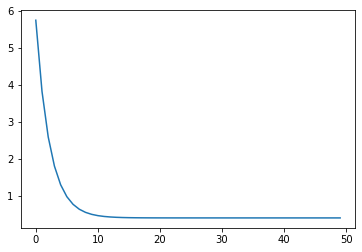

In [61]:
plt.plot(error_list)

In [62]:
X

array([-1.15777962, -0.36020313, -0.40488529, ...,  0.12057687,
        0.93557939,  0.43513924])

In [63]:
X[0]

-1.1577796160522869

In [67]:
# prediction
hypothesis(X[0], opt_weights)

-0.8918916441716114

## Avijit's Attempt !

In [37]:
def hypothesis(x,weights):
    return weights[0] + weights[1]*x

def error(X,Y,weights):
    total_error=0
    for i in range(len(X)):
        total_error+=(hypothesis(X[i],weights)-Y[i])**2
    return total_error/len(X)

def gradient(X,Y,weights):
    gradients=np.array([0,0])
    
    for i in range(len(X)):
        y_hat=hypothesis(X[i],weights)
        gradients[0]+=(y_hat-Y[i])
        gradients[1]+=(y_hat-Y[i])*X[i]
        
    return 2*gradients/len(X)

def gradient_descent(X,Y,n_iter,learning_rate):
    weights=[0,0]
    errors=[]
    errors.append(error(X,Y,weights))
    
    for i in range(n_iter):
        gradients=gradient(X,Y,weights)
        weights[0]=weights[0]-(learning_rate*gradients[0])
        weights[1]=weights[1]-(learning_rate*gradients[1])
        errors.append(error(X,Y,weights))
        
    return weights,errors

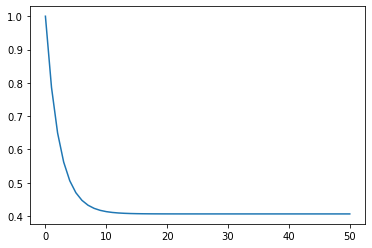

In [43]:
n_iter=50
learning_rate=0.1
weights,errors=gradient_descent(X,Y,n_iter,learning_rate)
plt.plot(range(n_iter+1),errors)

In [ ]:
def hypothesis(x, weights):
    '''
    x : real input value (max power)
    weights : list of w0 and w1
    '''
    y_hat = weights[0] + weights[1]*x
    return y_hat

In [ ]:
def error(X, Y, weights):
    '''
    X : input n data points
    Y : target n data points
    weights : list of w0 and w1
    '''
    n = X.shape[0]
    total_err = 0.0
    for i in range(n):
        y_hat =hypothesis(X[i], weights)
        total_err += (Y[i] - y_hat)**2
        
    return total_err/n

In [ ]:
def gradient(X, Y, weights):
    n = X.shape[0]
    grad = np.zeros((2,))
    
    for i in range(n):
        y_hat = hypothesis(X[i], weights)
        
        grad[0] += (y_hat - Y[i])
        
        grad[1] += ((y_hat - Y[i])*X[i])
        
    return 2*grad/n

In [ ]:
def gradient_descent(X, Y, max_itr = 50, learning_rate = 0.1):
    # step 1 : init() randomly
    
    weights = np.random.randn(2)
    error_list = []
    
    # step 2 repeate until convergence
    for i in range(max_itr):
        
        e = error(X, Y, weights)
        error_list.append(e)
        
        grad = gradient(X, Y, weights)
        
        weights[0] = weights[0] - learning_rate*grad[0]
        weights[1] = weights[1] - learning_rate*grad[1]
        
    
    return weights, error_list